In [1]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pylab as plt
from alexnet import AlexNet
import os
import alexnet_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/zhangsl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
IMAGES_PATH = './test_images'
IMAGENET_MEAN = alexnet_utils.rgb_shift
IMAGENET_CLASSES = alexnet_utils.imagenet_classes

In [3]:
images_orig = [cv2.imread(os.path.join(IMAGES_PATH, i)) for i in os.listdir(IMAGES_PATH)]

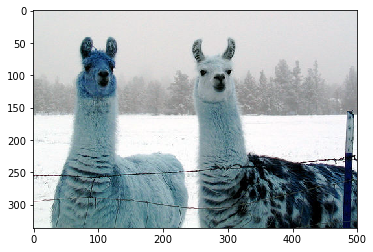

In [4]:
plt.imshow(images_orig[0])

In [5]:
images_resize = [cv2.resize(i, (227, 227)) for i in images_orig]

In [6]:
images_rgb = [i[:, :, ::-1] for i in images_resize]

In [7]:
images_resize = [i[np.newaxis, :, :, :] for i in images_rgb]

In [8]:
images_np = np.concatenate(images_resize, axis=0)

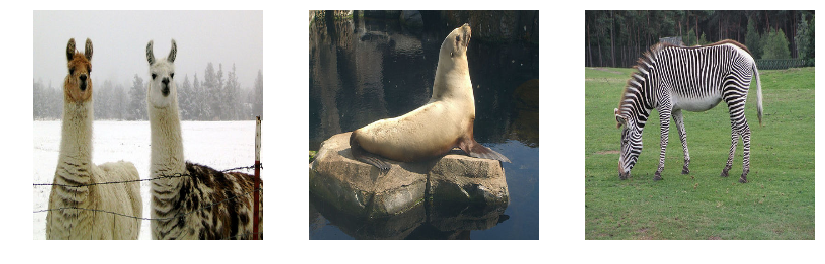

In [9]:
plt.figure(figsize=(14, 14))
for i in range(images_np.shape[0]):
    plt.subplot(1, images_np.shape[0], i+1)
    plt.imshow(images_np[i])
    plt.axis('off')

In [10]:
images_input = images_np - IMAGENET_MEAN

In [11]:
tf.reset_default_graph()
alexnet = AlexNet()

In [12]:
interface = alexnet.interface()

In [13]:
X_p = interface['input_placeholder']
keep_prob_p = interface['keep_prob_placeholder']
Y_op = interface['output_A']

In [14]:
sess = tf.Session()

In [15]:
test_writer = tf.summary.FileWriter('./imagenet_test_tensorboard', sess.graph)

In [16]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [17]:
alexnet.load_imagenet_weights(sess)

Found and verified ./alexnet_weights.npy


In [18]:
Y = sess.run(Y_op, feed_dict={X_p: images_input, keep_prob_p: 1})

In [19]:
predictions = np.argmax(Y, axis=1)
probabilitys = np.max(Y, axis=1)

In [20]:
classes = np.array(IMAGENET_CLASSES)[predictions]

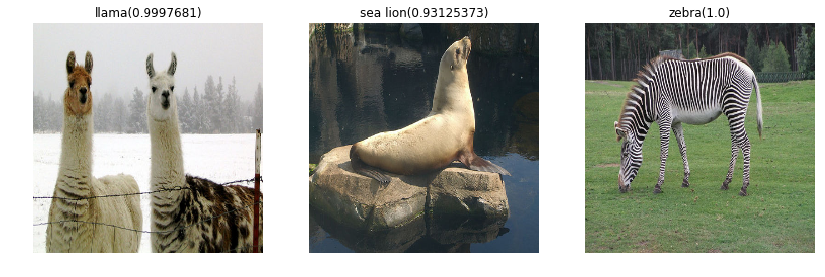

In [21]:
plt.figure(figsize=(14, 14))
for i in range(images_np.shape[0]):
    plt.subplot(1, images_np.shape[0], i+1)
    plt.imshow(images_np[i])
    plt.axis('off')
    plt.title(classes[i] + '(' + str(probabilitys[i]) + ')')